In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import imageio
from scipy.misc import imread, imsave, imresize
import PIL
from PIL import Image
from skimage import transform,io
from resizeimage import resizeimage
import scipy.io as sio
import scipy.misc
from skimage.transform import rescale, resize as rs, downscale_local_mean

/home/cuchuflito/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#model=load_model('model.h5')
def impr(word):
    print ('\033[1m' + word + '\033[0m')
font = {'family': 'serif',
        'color':  'black',
        'weight': 15,
        'size': 16,
        }
file=sio.loadmat('emnist-letters.mat')


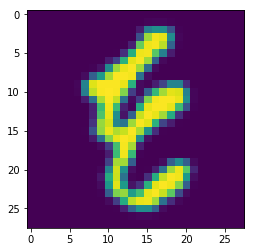

[1]
(124800, 784)
(124800,)


In [3]:
#plt.imshow((rotate(file['dataset'][0,0][0][0][0][0][1].reshape(28,28),-90)))
plt.imshow(file['dataset'][0,0][0][0][0][0][590].reshape(28,28))
plt.show()
#print(file['dataset'][0,0][1][0,0][0].shape)#[:,0])
#print(file['dataset'][0,0][0][0,0][0].shape)
#plt.imshow(file['dataset'][0,0][0][0][0].shape)
print((file['dataset'][0,0][1][0][0][1][10]))
train=file['dataset'][0,0][0][0][0][0]
train_labels=file['dataset'][0,0][0][0][0][1]
test=file['dataset'][0,0][1][0][0][0]
test_labels=file['dataset'][0,0][1][0][0][1]
labels=[]
for i in train_labels:
    labels=np.append(labels,int(i[0]))
print(train.shape)
train_labels=labels-1   #empieza en 1 los labels----> les resto uno, sino hay problemas con el to_categorical 
print(train_labels.shape)

In [4]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1) #tensorflow channels_last
num_classes = 26
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
print(np.max(train_labels))
train = train.reshape(train.shape[0], img_rows, img_cols, 1).astype('float32')/255

25.0


In [5]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
train_labels = keras.utils.to_categorical(train_labels,26)
model.fit(train,train_labels, batch_size=4*128, epochs=25, verbose=1)

Epoch 1/25
 15872/124800 [==>...........................] - ETA: 4:10 - loss: 2.4862 - acc: 0.2842

KeyboardInterrupt: 

In [6]:
model.save('modelo_EMNIST.h5')

In [8]:

test = test.reshape(test.shape[0], img_rows, img_cols, 1).astype('float32')/255
prediction=model.predict_classes(test)

In [ ]:
prediction-test_labels)/